In [63]:
import os

import pandas as pd
import numpy as np

from functools import partial

In [13]:
read_csv=partial(pd.read_csv,
    parse_dates=['date_time'],
    infer_datetime_format=True,
    index_col=['date_time'],
    dtype={'id': 'uint16',
           'load': 'float32',
           'is_holiday': 'uint8',
           'weekday': 'uint8'})

# Thesis data

In [14]:
thesis_data_path='../../data/CER Electricity Revised March 2012/preprocessed/mini'

In [17]:
thesis_train_data=read_csv(os.path.join(thesis_data_path,'train.csv'))

In [111]:
thesis_train_data.describe()#.load['max']

,id,load,tempC,is_holiday
count,9.140064e+06,9.140064e+06,9.140064e+06,9.140064e+06
mean,4.093426e+03,5.162401e-01,1.052850e+01,3.054018e-01
std,1.858243e+03,6.892268e-01,4.258594e+00,4.605774e-01
min,1.014000e+03,1.000000e-03,0.000000e+00,0.000000e+00
25%,2.442000e+03,1.280000e-01,7.000000e+00,0.000000e+00
50%,4.072000e+03,2.650000e-01,1.100000e+01,0.000000e+00
75%,5.622000e+03,6.010000e-01,1.400000e+01,1.000000e+00
max,7.440000e+03,1.280000e+01,1.900000e+01,1.000000e+00


In [42]:
thesis_train_data.id.unique().size

405

<AxesSubplot:ylabel='Frequency'>

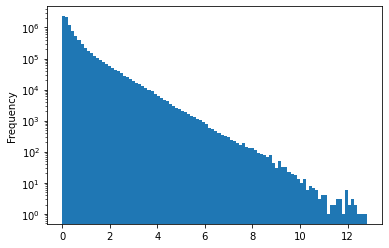

In [46]:
thesis_train_data.load.plot.hist(logy=True, bins=100)

# Paper data set

In [30]:
paper_data_path='../../paper_data/mini'

In [31]:
paper_train_data=read_csv(os.path.join(paper_data_path,'train.csv'))

In [112]:
paper_train_data.describe()#.load['max']

,id,load,is_holiday,weekday
count,8.276400e+06,8.276400e+06,8.276400e+06,8.276400e+06
mean,4.117201e+03,5.011642e-01,2.526316e-02,3.006316e+00
std,1.905538e+03,7.013627e-01,1.569233e-01,1.997357e+00
min,1.035000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.416000e+03,1.200000e-01,0.000000e+00,1.000000e+00
50%,4.109000e+03,2.470000e-01,0.000000e+00,3.000000e+00
75%,5.832000e+03,5.760000e-01,0.000000e+00,5.000000e+00
max,7.436000e+03,1.413400e+01,1.000000e+00,6.000000e+00


In [34]:
paper_train_data.id.unique().size

363

<AxesSubplot:ylabel='Frequency'>

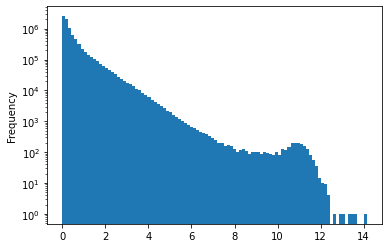

In [52]:
paper_train_data.load.plot.hist(logy=True, bins=100)

In [100]:
huge_load = paper_train_data[paper_train_data.load > paper_train_data.load.quantile(0.99)]
huge_load.load.mean()

4.480464

In [103]:
paper_train_data[paper_train_data.id.isin(huge_load.id) & paper_train_data.index.date.to(huge_load.index.date)]

AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [105]:
paper_train_data.index.date

array([datetime.date(2009, 7, 14), datetime.date(2009, 7, 14),
       datetime.date(2009, 7, 14), ..., datetime.date(2010, 10, 31),
       datetime.date(2010, 10, 31), datetime.date(2010, 10, 31)],
      dtype=object)

In [65]:
np.unique(huge_load.index.date)

array([datetime.date(2009, 7, 14), datetime.date(2009, 7, 15),
       datetime.date(2009, 7, 16), datetime.date(2009, 7, 17),
       datetime.date(2009, 7, 18), datetime.date(2009, 7, 19),
       datetime.date(2009, 7, 20), datetime.date(2009, 7, 21),
       datetime.date(2009, 7, 22), datetime.date(2009, 7, 23),
       datetime.date(2009, 7, 24), datetime.date(2009, 7, 25),
       datetime.date(2009, 7, 26), datetime.date(2009, 7, 27),
       datetime.date(2009, 7, 28), datetime.date(2009, 7, 29),
       datetime.date(2009, 7, 30), datetime.date(2009, 7, 31),
       datetime.date(2009, 8, 1), datetime.date(2009, 8, 2),
       datetime.date(2009, 8, 3), datetime.date(2009, 8, 4),
       datetime.date(2009, 8, 5), datetime.date(2009, 8, 6),
       datetime.date(2009, 8, 7), datetime.date(2009, 8, 8),
       datetime.date(2009, 8, 9), datetime.date(2009, 8, 10),
       datetime.date(2009, 8, 11), datetime.date(2009, 8, 12),
       datetime.date(2009, 8, 13), datetime.date(2009, 8, 14),
 

In [99]:
huge_load['minute'] = huge_load.index.hour*2+huge_load.index.minute//30
pt=pd.pivot_table(huge_load,
                  columns=huge_load['minute'],
                  index=['id'],
                  values='load')
pt

<ipython-input-99-8e92bb093930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huge_load['minute'] = huge_load.index.hour*2+huge_load.index.minute//30


minute,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
id,,,,,,,,,,,,,,,,,,,,,
1035,9.599400,9.733886,9.946589,9.667283,9.660816,9.668605,10.118368,9.939284,9.484213,9.05793,...,3.919273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.747424,10.871281
1052,NaN,NaN,3.917000,NaN,3.436000,NaN,NaN,NaN,NaN,NaN,...,4.313167,3.901250,3.595333,NaN,NaN,NaN,NaN,NaN,NaN,3.646000
1057,3.680000,3.503000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.281593,4.181954,3.892555,4.342708,3.869308,4.000375,3.8210,3.69725,3.474000,3.448000
1059,3.548500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.55300,...,3.939000,3.870400,3.656000,3.600000,3.458000,4.537000,4.2750,NaN,NaN,NaN
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.570000,NaN,NaN,NaN,4.606000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.062000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.863945,3.975909,3.712333,3.754167,3.746000,3.566167,3.7475,3.82800,3.660000,NaN
7428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.417000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Paper')

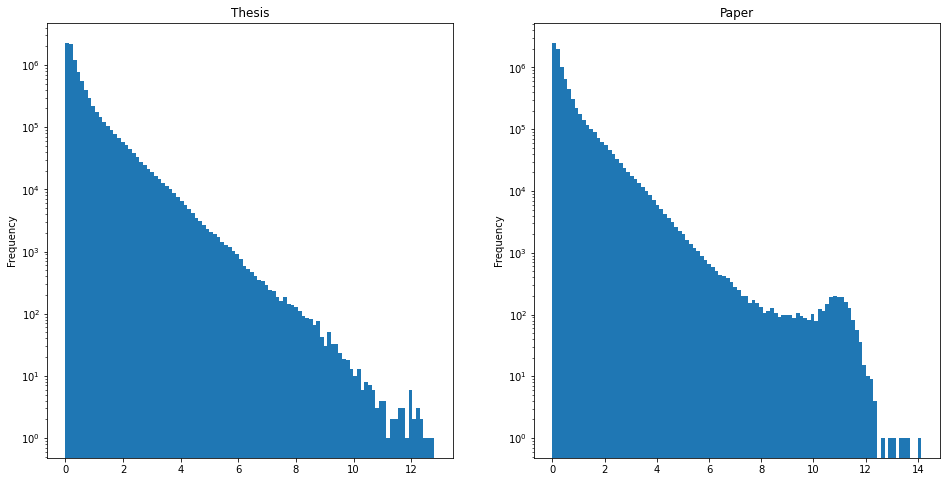

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(16,8))

thesis_train_data.load.plot.hist(logy=True, bins=100, ax = ax[0])
ax[0].set_title('Thesis')
paper_train_data.load.plot.hist(logy=True, bins=100, ax = ax[1])
ax[1].set_title('Paper')

In [118]:
thesis_train_data[sorted(thesis_train_data.columns)].corr()

,id,is_holiday,load,tempC
id,1.000000,-0.000148,-0.000852,-0.000416
is_holiday,-0.000148,1.000000,0.027524,-0.033468
load,-0.000852,0.027524,1.000000,-0.044340
tempC,-0.000416,-0.033468,-0.044340,1.000000


In [119]:
paper_train_data[sorted(paper_train_data.columns)].corr()

,id,is_holiday,load,weekday
id,1.000000e+00,3.234595e-16,-0.013807,1.189515e-17
is_holiday,3.234595e-16,1.000000e+00,0.016700,-1.415621e-01
load,-1.380676e-02,1.669981e-02,1.000000,1.788367e-02
weekday,1.189515e-17,-1.415621e-01,0.017884,1.000000e+00
